In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

## Read and preprocess data

In [3]:
data = pd.read_csv('house_prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
perc_missing = data.isnull().mean()*100
cols = perc_missing[perc_missing < 10].index.tolist() 
cols

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'Screen

In [5]:
data = data.loc[:, cols[1:]]

In [6]:
data_obj = pd.get_dummies(data.select_dtypes(include=[np.object]).fillna('NA'))
data_num = data.select_dtypes(include=[np.number]).fillna(-1)

data_final = pd.concat([data_obj, data_num], axis=1)

In [7]:
train, val = train, val = train_test_split(data_final, test_size=0.2, random_state=11)

x_train = train.drop(columns=['SalePrice'])
y_train = train['SalePrice'].values

x_val = val.drop(columns=['SalePrice'])
y_val = val['SalePrice'].values

In [8]:
train_mae_values, val_mae_values = {}, {}

## Build individual models for comparison

In [9]:
# Decision Tree

dt_params = {
    'criterion': 'mae',
    'min_samples_leaf': 10,
    'random_state': 11
}

dt = DecisionTreeRegressor(**dt_params)

dt.fit(x_train, y_train)
dt_preds_train = dt.predict(x_train)
dt_preds_val = dt.predict(x_val)

train_mae_values['dt'] = mean_absolute_error(y_true=y_train, y_pred=dt_preds_train)
val_mae_values['dt'] = mean_absolute_error(y_true=y_val, y_pred=dt_preds_val)

In [10]:
# k-Nearest Neighbours

knn_params = {
    'n_neighbors': 5
}

knn = KNeighborsRegressor(**knn_params)

knn.fit(x_train, y_train)
knn_preds_train = knn.predict(x_train)
knn_preds_val = knn.predict(x_val)

train_mae_values['knn'] = mean_absolute_error(y_true=y_train, y_pred=knn_preds_train)
val_mae_values['knn'] = mean_absolute_error(y_true=y_val, y_pred=knn_preds_val)

In [11]:
# Random Forest

rf_params = {
    'n_estimators': 50,
    'criterion': 'mae',
    'max_features': 'sqrt',
    'min_samples_leaf': 10,
    'random_state': 11,
    'n_jobs': -1
}

rf = RandomForestRegressor(**rf_params)

rf.fit(x_train, y_train)
rf_preds_train = rf.predict(x_train)
rf_preds_val = rf.predict(x_val)

train_mae_values['rf'] = mean_absolute_error(y_true=y_train, y_pred=rf_preds_train)
val_mae_values['rf'] = mean_absolute_error(y_true=y_val, y_pred=rf_preds_val)

In [12]:
# Gradient Boosting

gbr_params = {
    'n_estimators': 50,
    'criterion': 'mae',
    'max_features': 'sqrt',
    'max_depth': 3,
    'min_samples_leaf': 5,
    'random_state': 11
}

gbr = GradientBoostingRegressor(**gbr_params)

gbr.fit(x_train, y_train)
gbr_preds_train = gbr.predict(x_train)
gbr_preds_val = gbr.predict(x_val)

train_mae_values['gbr'] = mean_absolute_error(y_true=y_train, y_pred=gbr_preds_train)
val_mae_values['gbr'] = mean_absolute_error(y_true=y_val, y_pred=gbr_preds_val)

## Stacked model

In [28]:
num_base_predictors = len(train_mae_values) # 4

x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+num_base_predictors))
x_train_with_metapreds[:, :-num_base_predictors] = x_train
x_train_with_metapreds[:, -num_base_predictors:] = -1

In [21]:
kf = KFold(n_splits=5, random_state=11)

for train_indices, val_indices in kf.split(x_train):
    kfold_x_train, kfold_x_val = x_train.iloc[train_indices], x_train.iloc[val_indices]
    kfold_y_train, kfold_y_val = y_train[train_indices], y_train[val_indices]
    
    predictions = []
    
    dt = DecisionTreeRegressor(**dt_params)
    dt.fit(kfold_x_train, kfold_y_train)
    predictions.append(dt.predict(kfold_x_val))

    knn = KNeighborsRegressor(**knn_params)
    knn.fit(kfold_x_train, kfold_y_train)
    predictions.append(knn.predict(kfold_x_val))

    gbr = GradientBoostingRegressor(**gbr_params)
    rf.fit(kfold_x_train, kfold_y_train)
    predictions.append(rf.predict(kfold_x_val))

    gbr = GradientBoostingRegressor(**gbr_params)
    gbr.fit(kfold_x_train, kfold_y_train)
    predictions.append(gbr.predict(kfold_x_val))
    
    for i, preds in enumerate(predictions):
        x_train_with_metapreds[val_indices, -(i+1)] = preds

In [29]:
x_val_with_metapreds = np.zeros((x_val.shape[0], x_val.shape[1]+num_base_predictors))
x_val_with_metapreds[:, :-num_base_predictors] = x_val
x_val_with_metapreds[:, -num_base_predictors:] = -1

In [24]:
predictions = []
    
dt = DecisionTreeRegressor(**dt_params)
dt.fit(x_train, y_train)
predictions.append(dt.predict(x_val))

knn = KNeighborsRegressor(**knn_params)
knn.fit(x_train, y_train)
predictions.append(knn.predict(x_val))

gbr = GradientBoostingRegressor(**gbr_params)
rf.fit(x_train, y_train)
predictions.append(rf.predict(x_val))

gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(x_train, y_train)
predictions.append(gbr.predict(x_val))

for i, preds in enumerate(predictions):
    x_val_with_metapreds[:, -(i+1)] = preds

In [25]:
lr = LinearRegression(normalize=False)
lr.fit(x_train_with_metapreds, y_train)
lr_preds_train = lr.predict(x_train_with_metapreds)
lr_preds_val = lr.predict(x_val_with_metapreds)

train_mae_values['lr'] = mean_absolute_error(y_true=y_train, y_pred=lr_preds_train)
val_mae_values['lr'] = mean_absolute_error(y_true=y_val, y_pred=lr_preds_val)

## Visualising errors

In [26]:
mae_scores = pd.concat([pd.Series(train_mae_values, name='train'), 
                        pd.Series(val_mae_values, name='val')], 
                       axis=1)
mae_scores

,train,val
dt,16222.572774,25274.595890
gbr,16207.692537,20078.417487
knn,23669.883219,29642.142466
lr,12567.358027,17661.226920
rf,19484.653579,23023.638425


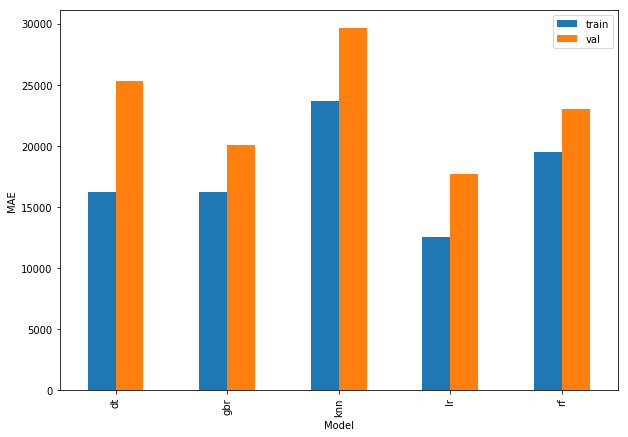

In [27]:
mae_scores.plot(kind='bar', figsize=(10,7))
plt.ylabel('MAE')
plt.xlabel('Model')
plt.show()